<a href="https://colab.research.google.com/github/sdasilvas/NGG6050/blob/main/QNC_Presentation2_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NeuroKO ROS


Descriptive Statistics for Neuronal Mito_CI ROS:

NeuroControl:
Mean: 0.0606
Median: 0.0565
IQR: 0.0238
Range: 0.0417
Standard Deviation: 0.0172
Skewness: -0.0035
Shapiro-Wilk test p-value: 0.6735
Data is normally distributed. Parametric test can be considered.

NeuroKO:
Mean: -0.0391
Median: -0.0381
IQR: 0.0249
Range: 0.0462
Standard Deviation: 0.0202
Skewness: -0.1281
Shapiro-Wilk test p-value: 0.9005
Data is normally distributed. Parametric test can be considered.


Levene's test p-value comparing Control vs NeuroKO for Neuronal Mito_CI ROS: 0.6621
t-test p-value comparing Control vs NeuroKO for Neuronal Mito_CI ROS: 0.0001
Cohen's d for Control vs NeuroKO comparison in Neuronal Mito_CI ROS: 6.0391

--------------------------------------------------


Descriptive Statistics for Neuronal Mito_CII ROS:

NeuroControl:
Mean: 0.0021
Median: 0.0010
IQR: 0.0170
Range: 0.0239
Standard Deviation: 0.0104
Skewness: 0.1485
Shapiro-Wilk test p-value: 0.5482
Data is normally distributed. Paramet

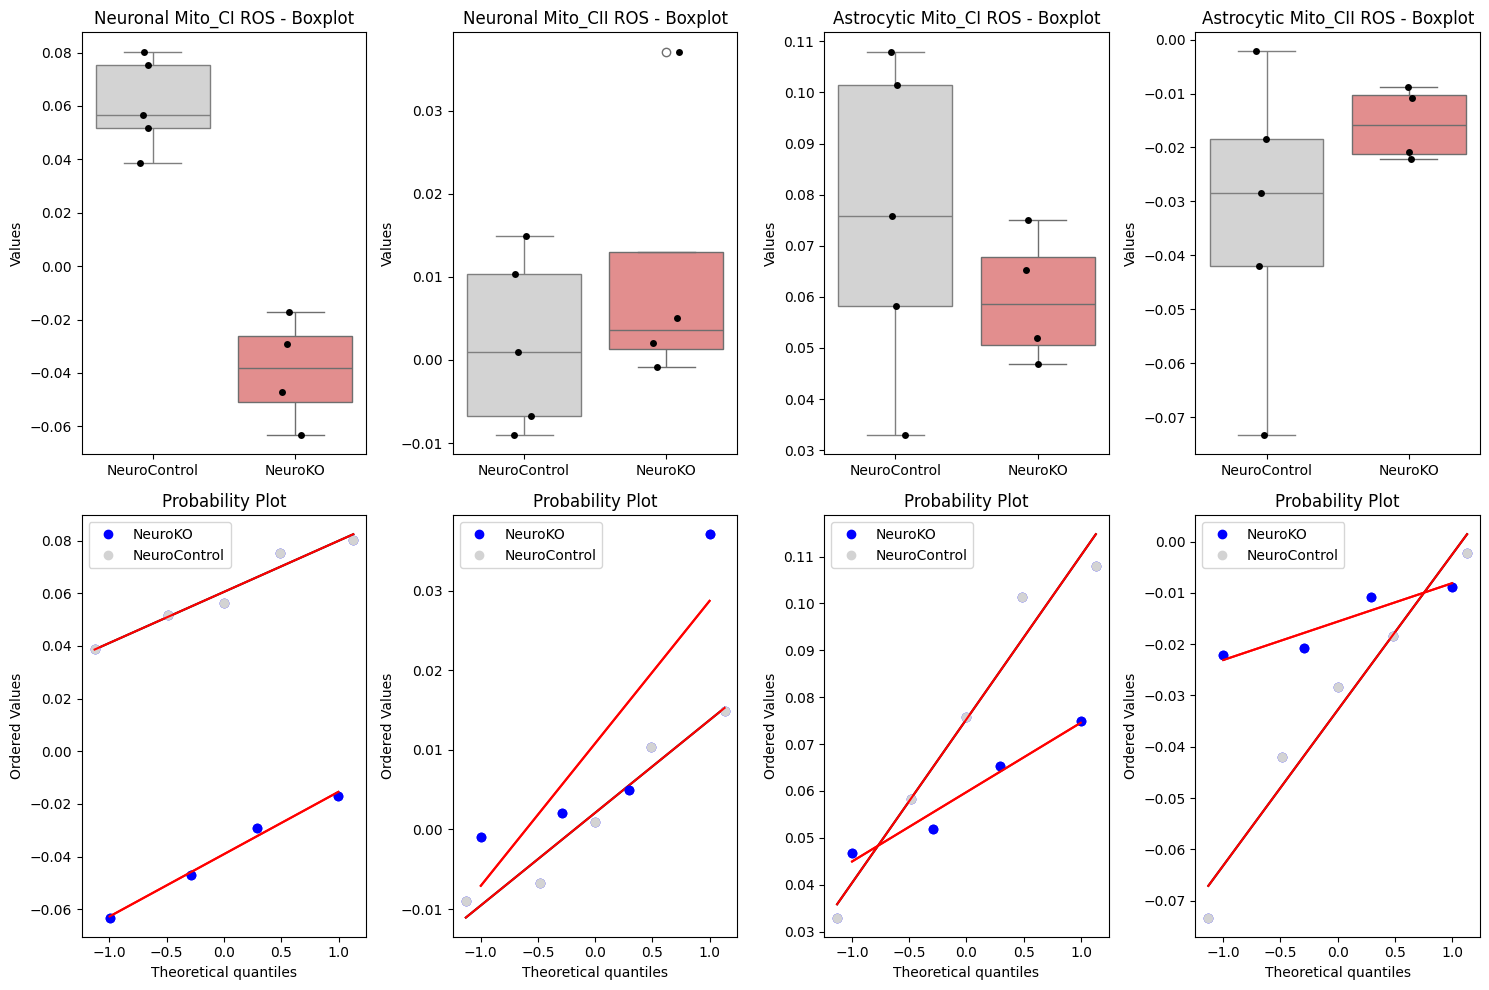

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.collections as collections
import seaborn as sns
from statsmodels.stats.power import TTestIndPower

# Data: Store experimental conditions as keys, and datasets as values (lists of lists or arrays)
conditions = {
    "Neuronal Mito_CI ROS": {
        "NeuroControl": [0.0387, 0.0565, 0.0804, 0.0755, 0.0517],
        "NeuroKO": [-0.01705, -0.0292, -0.0632, -0.047],
    },
    "Neuronal Mito_CII ROS": {
        "NeuroControl": [-0.009, 0.001, 0.0149, -0.0067, 0.0103],
        "NeuroKO": [-0.0009, 0.0021, 0.005, 0.0371],
    },
    "Astrocytic Mito_CI ROS": {
        "NeuroControl": [0.0583, 0.033, 0.108, 0.0758, 0.1014],
        "NeuroKO": [0.075, 0.0468, 0.06534, 0.0519],
    },
    "Astrocytic Mito_CII ROS": {
        "NeuroControl": [-0.0184, -0.0022, -0.0733, -0.0284, -0.04193],
        "NeuroKO": [-0.0208, -0.0088, -0.01074, -0.0221],
    }
}

# Set up figure for plotting
num_conditions = len(conditions)
fig, axes = plt.subplots(nrows=2, ncols=num_conditions, figsize=(15, 10))

# Helper function to print statistics
def print_stats(label, data):
    stats_dict = {
        "Mean": np.mean(data),
        "Median": np.median(data),
        "IQR": np.percentile(data, 75) - np.percentile(data, 25),
        "Range": np.ptp(data),
        "Standard Deviation": np.std(data, ddof=1),
        "Skewness": stats.skew(data),
    }

    print(f"\n{label}:")
    for k, v in stats_dict.items():
        print(f"{k}: {v:.4f}")

    return stats.shapiro(data)  # Return the result of Shapiro-Wilk test

# Helper function to run statistical tests
def run_statistical_tests(control_data, neuroKO_data, condition_name):
    # Levene's test for equality of variances
    levene_stat, levene_p = stats.levene(control_data, neuroKO_data)
    print(f"Levene's test p-value comparing Control vs NeuroKO for {condition_name}: {levene_p:.4f}")

    # Choose test based on normality and variance equality
    if levene_p >= 0.05:  # If variances are equal
        t_stat, t_p = stats.ttest_ind(control_data, neuroKO_data)
        print(f"t-test p-value comparing Control vs NeuroKO for {condition_name}: {t_p:.4f}")
    else:  # If variances are unequal
        t_stat, t_p = stats.ttest_ind(control_data, neuroKO_data, equal_var=False)
        print(f"Welch's t-test p-value comparing Control vs NeuroKO for {condition_name}: {t_p:.4f}")

    # Calculate Cohen's d for effect size
    cohen_d = (np.mean(control_data) - np.mean(neuroKO_data)) / np.sqrt(((np.std(control_data) ** 2) + (np.std(neuroKO_data) ** 2)) / 2)
    print(f"Cohen's d for Control vs NeuroKO comparison in {condition_name}: {cohen_d:.4f}")


# Iterate over conditions
for i, (condition_name, condition_data) in enumerate(conditions.items()):
    print(f"\nDescriptive Statistics for {condition_name}:")

    # Iterate over datasets (Control vs NeuroKO)
    for label, data in condition_data.items():
        # Print descriptive statistics and return Shapiro-Wilk p-value
        shapiro_stat, shapiro_p = print_stats(label, data)

        # Normality check
        print(f"Shapiro-Wilk test p-value: {shapiro_p:.4f}")
        if shapiro_p < 0.05:
            print("Data is not normally distributed. Non-parametric test may be needed.")
        else:
            print("Data is normally distributed. Parametric test can be considered.")

        # Q-Q Plot for NeuroControl and NeuroKO
        res = stats.probplot(data, dist="norm", plot=axes[1, i])
        if label == "NeuroControl":
            res_cc = stats.probplot(condition_data["NeuroControl"], dist="norm", plot=axes[1, i])
            axes[1, i].get_lines()[1].set_color('black')       # Color for reference line
            axes[1, i].get_lines()[2].set_color('lightgrey')    # Color for NeuroKO datapoints
            axes[1, i].get_lines()[2].set_label("NeuroControl")

        if label == "NeuroKO":
            res_kk = stats.probplot(condition_data["NeuroKO"], dist="norm", plot=axes[1, i])
            axes[1, i].get_lines()[1].set_color('black')     # Color for reference line
            axes[1, i].get_lines()[0].set_color('blue')  # Color for NeuroKO datapoints
            axes[1, i].get_lines()[0].set_label("NeuroKO")


        #Boxplot
        if label == "NeuroControl":
            sns.boxplot(x=np.repeat(label, len(data)), y=data, ax=axes[0, i], whis=1.5, color='lightgrey')  # Grey boxplot for NeuroControl
            sns.stripplot(x=np.repeat(label, len(data)), y=data, color='black', jitter=True, ax=axes[0, i])
            axes[0, i].set_title(f"{condition_name} - Boxplot")
            axes[0, i].set_ylabel("Values")
        if label == "NeuroKO":
            sns.boxplot(x=np.repeat(label, len(data)), y=data, ax=axes[0, i], whis=1.5, color='lightcoral')  # Red boxplot for NeuroKO
            sns.stripplot(x=np.repeat(label, len(data)), y=data, color='black', jitter=True, ax=axes[0, i])
            axes[0, i].set_title(f"{condition_name} - Boxplot")
            axes[0, i].set_ylabel("Values")

        # Add legend for both NeuroControl and NeuroKO
        axes[1, i].legend(loc='best')

    # Add space after each condition
    print("\n")

    # Compare Control vs NeuroKO
    control_data = condition_data["NeuroControl"]
    neuroKO_data = condition_data["NeuroKO"]

    # Run Levene's test, t-test/Welch's t-test, and Cohen's d
    run_statistical_tests(control_data, neuroKO_data, condition_name)

    # Add space after each condition
    print("\n" + "-"*50 + "\n")

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower

# Data: Store experimental conditions as keys, and datasets as values (lists of lists or arrays)
conditions = {
    "Neuronal Mito_CI ROS": {
        "NeuroControl": [0.0387, 0.0565, 0.0804, 0.0755, 0.0517],
        "NeuroKO": [-0.01705, -0.0292, -0.0632, -0.047],
    },
    "Neuronal Mito_CII ROS": {
        "NeuroControl": [-0.009, 0.001, 0.0149, -0.0067, 0.0103],
        "NeuroKO": [-0.0009, 0.0021, 0.005, 0.0371],
    },
    "Astrocytic Mito_CI ROS": {
        "NeuroControl": [0.0583, 0.033, 0.108, 0.0758, 0.1014],
        "NeuroKO": [0.075, 0.0468, 0.06534, 0.0519],
    },
    "Astrocytic Mito_CII ROS": {
        "NeuroControl": [-0.0184, -0.0022, -0.0733, -0.0284, -0.04193],
        "NeuroKO": [-0.0208, -0.0088, -0.01074, -0.0221],
    }
}

# Helper function to calculate effect size (Cohen's d)
def calculate_cohens_d(control_data, neuroKO_data):
    mean_control = np.mean(control_data)
    mean_neuroKO = np.mean(neuroKO_data)
    std_control = np.std(control_data, ddof=1)
    std_neuroKO = np.std(neuroKO_data, ddof=1)

    pooled_std = np.sqrt(((std_control ** 2) + (std_neuroKO ** 2)) / 2)
    cohen_d = (mean_control - mean_neuroKO) / pooled_std
    return cohen_d

# Power analysis for sample size calculation
def calculate_sample_size(effect_size, alpha=0.05, power=0.80):
    analysis = TTestIndPower()
    required_sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)
    return np.ceil(required_sample_size)  # Round up to the next whole number

# Iterate over conditions and calculate power and sample size
for condition_name, condition_data in conditions.items():
    print(f"\nPower Analysis for {condition_name}:")

    control_data = condition_data["NeuroControl"]
    neuroKO_data = condition_data["NeuroKO"]

    # Calculate effect size (Cohen's d) based on preliminary data
    cohen_d = calculate_cohens_d(control_data, neuroKO_data)
    print(f"Cohen's d for {condition_name}: {cohen_d:.4f}")

    # Perform power analysis to calculate required sample size for 80% power
    required_sample_size = calculate_sample_size(cohen_d)
    print(f"Required sample size for 80% power at α = 0.05: {required_sample_size:.0f}")

    print("-" * 50)


Power Analysis for Neuronal Mito_CI ROS:
Cohen's d for Neuronal Mito_CI ROS: 5.3029
Required sample size for 80% power at α = 0.05: 3
--------------------------------------------------

Power Analysis for Neuronal Mito_CII ROS:
Cohen's d for Neuronal Mito_CII ROS: -0.6015
Required sample size for 80% power at α = 0.05: 45
--------------------------------------------------

Power Analysis for Astrocytic Mito_CI ROS:
Cohen's d for Astrocytic Mito_CI ROS: 0.6562
Required sample size for 80% power at α = 0.05: 38
--------------------------------------------------

Power Analysis for Astrocytic Mito_CII ROS:
Cohen's d for Astrocytic Mito_CII ROS: -0.8795
Required sample size for 80% power at α = 0.05: 22
--------------------------------------------------


# AstKO ROS


Descriptive Statistics for Neuronal Mito_CI ROS:

AstControl:
Mean: 0.0125
Median: 0.0108
IQR: 0.0049
Range: 0.0285
Standard Deviation: 0.0103
Skewness: 0.3498
Shapiro-Wilk test p-value: 0.7777
Data is normally distributed. Parametric test can be considered.

AstKO:
Mean: 0.1834
Median: 0.1859
IQR: 0.0106
Range: 0.0173
Standard Deviation: 0.0073
Skewness: -0.4177
Shapiro-Wilk test p-value: 0.5061
Data is normally distributed. Parametric test can be considered.


Levene's test p-value comparing Control vs AstKO for Neuronal Mito_CI ROS: 0.7837
t-test p-value comparing Control vs AstKO for Neuronal Mito_CI ROS: 0.0000
Cohen's d for Control vs AstKO comparison in Neuronal Mito_CI ROS: -21.3818

--------------------------------------------------


Descriptive Statistics for Neuronal Mito_CII ROS:

AstControl:
Mean: 0.0039
Median: 0.0057
IQR: 0.0077
Range: 0.0164
Standard Deviation: 0.0066
Skewness: 0.1115
Shapiro-Wilk test p-value: 0.6768
Data is normally distributed. Parametric test can 

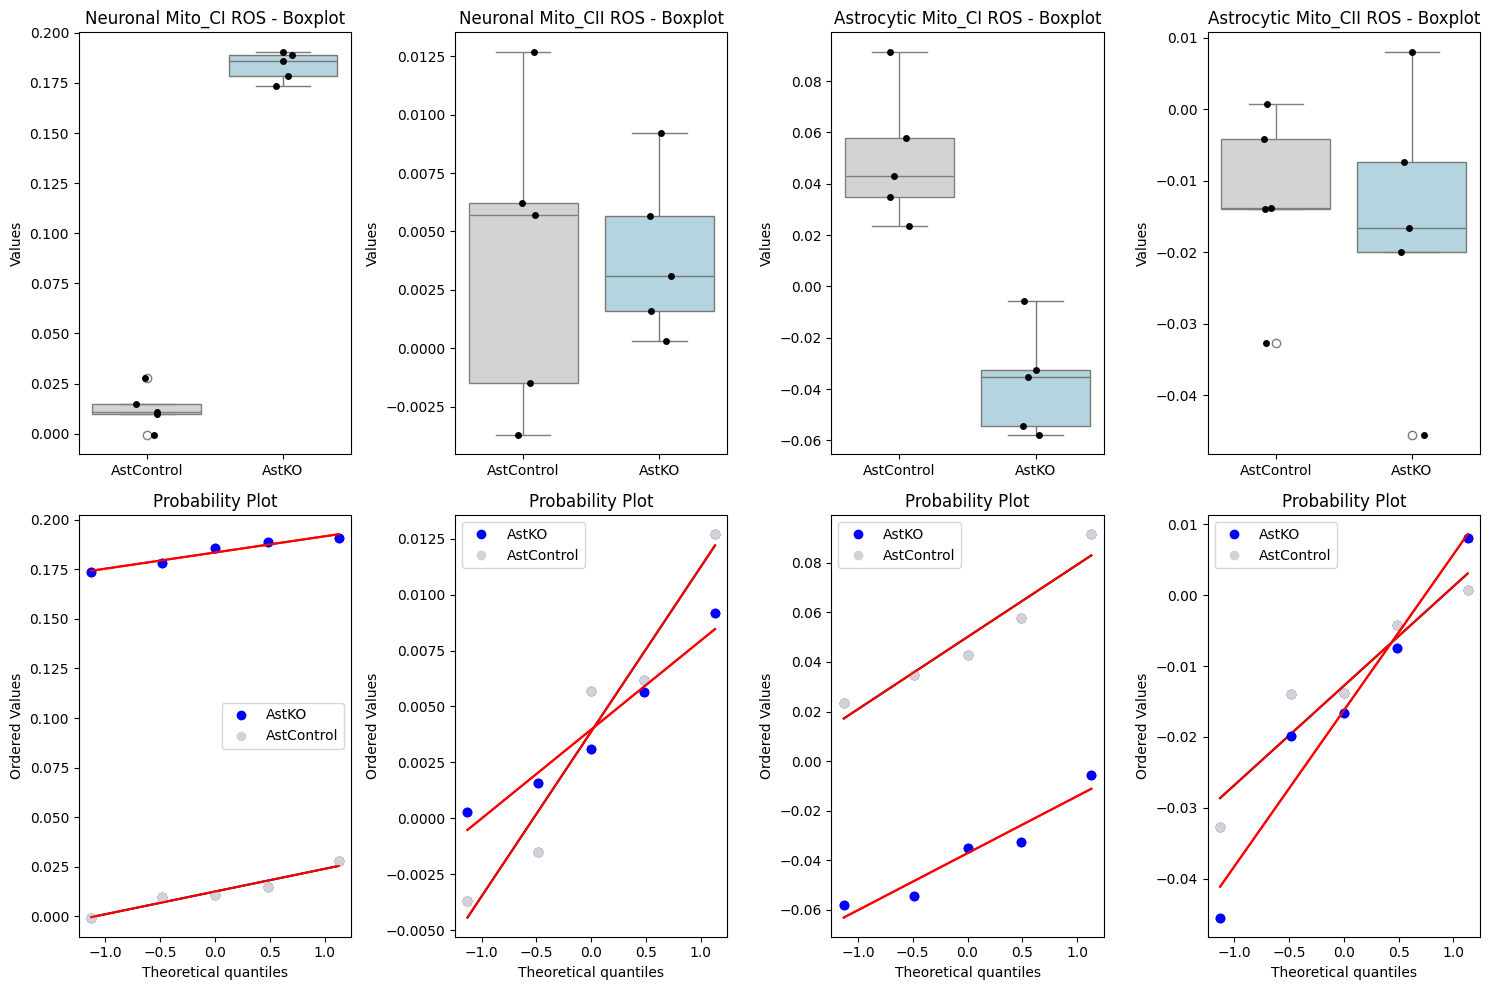

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.collections as collections
import seaborn as sns
from statsmodels.stats.power import TTestIndPower

# Data: Store experimental conditions as keys, and datasets as values (lists of lists or arrays)
conditions = {
    "Neuronal Mito_CI ROS": {
        "AstControl": [-0.0006, 0.0098, 0.0279, 0.0108, 0.0147],
        "AstKO": [0.1734, 0.1907, 0.1889, 0.1859, 0.17835],
    },
    "Neuronal Mito_CII ROS": {
        "AstControl": [0.0127, 0.0062, 0.0057, -0.0015, -0.0037],
        "AstKO": [0.00565, 0.0092, 0.0016, 0.0003, 0.0031],
    },
    "Astrocytic Mito_CI ROS": {
        "AstControl": [0.0347, 0.0429, 0.0915, 0.0578, 0.0235],
        "AstKO": [-0.0351, -0.0544, -0.0578, -0.0325, -0.0057],
    },
    "Astrocytic Mito_CII ROS": {
        "AstControl": [0.0007, -0.0042, -0.0138, -0.0139, -0.0327],
        "AstKO": [-0.0455, -0.0074, 0.0081, -0.0166, -0.0199],
    }
}

# Set up figure for plotting
num_conditions = len(conditions)
fig, axes = plt.subplots(nrows=2, ncols=num_conditions, figsize=(15, 10))

# Helper function to print statistics
def print_stats(label, data):
    stats_dict = {
        "Mean": np.mean(data),
        "Median": np.median(data),
        "IQR": np.percentile(data, 75) - np.percentile(data, 25),
        "Range": np.ptp(data),
        "Standard Deviation": np.std(data, ddof=1),
        "Skewness": stats.skew(data),
    }

    print(f"\n{label}:")
    for k, v in stats_dict.items():
        print(f"{k}: {v:.4f}")

    return stats.shapiro(data)  # Return the result of Shapiro-Wilk test

# Helper function to run statistical tests
def run_statistical_tests(control_data, AstKO_data, condition_name):
    # Levene's test for equality of variances
    levene_stat, levene_p = stats.levene(control_data, astKO_data)
    print(f"Levene's test p-value comparing Control vs AstKO for {condition_name}: {levene_p:.4f}")

    # Choose test based on normality and variance equality
    if levene_p >= 0.05:  # If variances are equal
        t_stat, t_p = stats.ttest_ind(control_data, astKO_data)
        print(f"t-test p-value comparing Control vs AstKO for {condition_name}: {t_p:.4f}")
    else:  # If variances are unequal
        t_stat, t_p = stats.ttest_ind(control_data, astKO_data, equal_var=False)
        print(f"Welch's t-test p-value comparing Control vs AstKO for {condition_name}: {t_p:.4f}")

    # Calculate Cohen's d for effect size
    cohen_d = (np.mean(control_data) - np.mean(astKO_data)) / np.sqrt(((np.std(control_data) ** 2) + (np.std(AstKO_data) ** 2)) / 2)
    print(f"Cohen's d for Control vs AstKO comparison in {condition_name}: {cohen_d:.4f}")

# Iterate over conditions
for i, (condition_name, condition_data) in enumerate(conditions.items()):
    print(f"\nDescriptive Statistics for {condition_name}:")

    # Iterate over datasets (Control vs AstKO)
    for label, data in condition_data.items():
        # Print descriptive statistics and return Shapiro-Wilk p-value
        shapiro_stat, shapiro_p = print_stats(label, data)

        # Normality check
        print(f"Shapiro-Wilk test p-value: {shapiro_p:.4f}")
        if shapiro_p < 0.05:
            print("Data is not normally distributed. Non-parametric test may be needed.")
        else:
            print("Data is normally distributed. Parametric test can be considered.")

        # Q-Q Plot for AstControl and AstKO
        res = stats.probplot(data, dist="norm", plot=axes[1, i])
        if label == "AstControl":
            res_cc = stats.probplot(condition_data["AstControl"], dist="norm", plot=axes[1, i])
            axes[1, i].get_lines()[1].set_color('black')       # Color for reference line
            axes[1, i].get_lines()[2].set_color('lightgrey')    # Color for AstKO datapoints
            axes[1, i].get_lines()[2].set_label("AstControl")

        if label == "AstKO":
            res_kk = stats.probplot(condition_data["AstKO"], dist="norm", plot=axes[1, i])
            axes[1, i].get_lines()[1].set_color('black')     # Color for reference line
            axes[1, i].get_lines()[0].set_color('blue')  # Color for AstKO datapoints
            axes[1, i].get_lines()[0].set_label("AstKO")


        #Boxplot
        if label == "AstControl":
            sns.boxplot(x=np.repeat(label, len(data)), y=data, ax=axes[0, i], whis=1.5, color='lightgrey')  # Grey boxplot for AstControl
            sns.stripplot(x=np.repeat(label, len(data)), y=data, color='black', jitter=True, ax=axes[0, i])
            axes[0, i].set_title(f"{condition_name} - Boxplot")
            axes[0, i].set_ylabel("Values")
        if label == "AstKO":
            sns.boxplot(x=np.repeat(label, len(data)), y=data, ax=axes[0, i], whis=1.5, color='lightblue')  # Red boxplot for AstKO
            sns.stripplot(x=np.repeat(label, len(data)), y=data, color='black', jitter=True, ax=axes[0, i])
            axes[0, i].set_title(f"{condition_name} - Boxplot")
            axes[0, i].set_ylabel("Values")

        # Add legend for both AstControl and AstKO
        axes[1, i].legend(loc='best')

    # Add space after each condition
    print("\n")

    # Compare Control vs AstKO
    control_data = condition_data["AstControl"]
    astKO_data = condition_data["AstKO"]

    # Run Levene's test, t-test/Welch's t-test, and Cohen's d
    run_statistical_tests(control_data, astKO_data, condition_name)

    # Add space after each condition
    print("\n" + "-"*50 + "\n")

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower
import warnings

# New Data: Store experimental conditions as keys, and datasets as values (lists of lists or arrays)
conditions = {
    "Neuronal Mito_CI ROS": {
        "AstControl": [-0.0006, 0.0098, 0.0279, 0.0108, 0.0147],
        "AstKO": [0.1734, 0.1907, 0.1889, 0.1859, 0.17835],
    },
    "Neuronal Mito_CII ROS": {
        "AstControl": [0.0127, 0.0062, 0.0057, -0.0015, -0.0037],
        "AstKO": [0.00565, 0.0092, 0.0016, 0.0003, 0.0031],
    },
    "Astrocytic Mito_CI ROS": {
        "AstControl": [0.0347, 0.0429, 0.0915, 0.0578, 0.0235],
        "AstKO": [-0.0351, -0.0544, -0.0578, -0.0325, -0.0057],
    },
    "Astrocytic Mito_CII ROS": {
        "AstControl": [0.0007, -0.0042, -0.0138, -0.0139, -0.0327],
        "AstKO": [-0.0455, -0.0074, 0.0081, -0.0166, -0.0199],
    }
}

# Helper function to calculate effect size (Cohen's d)
def calculate_cohens_d(control_data, neuroKO_data):
    mean_control = np.mean(control_data)
    mean_neuroKO = np.mean(neuroKO_data)
    std_control = np.std(control_data, ddof=1)
    std_neuroKO = np.std(neuroKO_data, ddof=1)

    pooled_std = np.sqrt(((std_control ** 2) + (std_neuroKO ** 2)) / 2)
    cohen_d = (mean_control - mean_neuroKO) / pooled_std
    return cohen_d

# Power analysis for sample size calculation
def calculate_sample_size(effect_size, alpha=0.05, power=0.80):
    analysis = TTestIndPower()
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning)
        required_sample_size = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)
    return required_sample_size  # Keep the value as float for easier validation

# Iterate over conditions and calculate power and sample size
for condition_name, condition_data in conditions.items():
    print(f"\nPower Analysis for {condition_name}:")

    control_data = np.array(condition_data["AstControl"])  # Ensure data is in numpy array format
    neuroKO_data = np.array(condition_data["AstKO"])  # Ensure data is in numpy array format

    # Calculate effect size (Cohen's d) based on preliminary data
    cohen_d = calculate_cohens_d(control_data, neuroKO_data)
    print(f"Cohen's d for {condition_name}: {cohen_d:.4f}")

    # Perform power analysis to calculate required sample size for 80% power
    required_sample_size = calculate_sample_size(cohen_d)

    # Check if the required sample size is a valid scalar value
    if np.isnan(required_sample_size) or required_sample_size <= 0:
        print("Error: Invalid required sample size. The effect size might be too small or zero.")
    else:
        # Ensure that the required sample size is a scalar
        required_sample_size_scalar = float(required_sample_size) if isinstance(required_sample_size, np.ndarray) else required_sample_size
        print(f"Required sample size for 80% power at α = 0.05: {np.ceil(required_sample_size_scalar):.0f}")

    print("-" * 50)


Power Analysis for Neuronal Mito_CI ROS:
Cohen's d for Neuronal Mito_CI ROS: -19.1245
Required sample size for 80% power at α = 0.05: 10
--------------------------------------------------

Power Analysis for Neuronal Mito_CII ROS:
Cohen's d for Neuronal Mito_CII ROS: -0.0171
Required sample size for 80% power at α = 0.05: 54000
--------------------------------------------------

Power Analysis for Astrocytic Mito_CI ROS:
Cohen's d for Astrocytic Mito_CI ROS: 3.6723
Required sample size for 80% power at α = 0.05: 3
--------------------------------------------------

Power Analysis for Astrocytic Mito_CII ROS:
Cohen's d for Astrocytic Mito_CII ROS: 0.2101
Required sample size for 80% power at α = 0.05: 357
--------------------------------------------------


<ipython-input-33-102bda1c2e39>:64: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  required_sample_size_scalar = float(required_sample_size) if isinstance(required_sample_size, np.ndarray) else required_sample_size


# NeuroKO_Neuronal Respiration


Descriptive Statistics for OXPHOS CI:

control:
Mean: 8.3971
Median: 8.4869
IQR: 0.5659
Range: 1.8064
Standard Deviation: 0.6737
Skewness: -0.3488
Shapiro-Wilk test p-value: 0.9585
Data is normally distributed. Parametric test can be considered.

NeuroKO:
Mean: 5.4073
Median: 5.1067
IQR: 0.5831
Range: 1.7012
Standard Deviation: 0.7811
Skewness: 1.0376
Shapiro-Wilk test p-value: 0.0888
Data is normally distributed. Parametric test can be considered.


Levene's test p-value comparing control vs NeuroKO for OXPHOS CI: 0.9926
t-test p-value comparing control vs NeuroKO for OXPHOS CI: 0.0005
Cohen's d for control vs NeuroKO comparison in OXPHOS CI: 4.6671

--------------------------------------------------


Descriptive Statistics for OXPHOS CII:

control:
Mean: 21.9816
Median: 22.2725
IQR: 1.8428
Range: 7.7261
Standard Deviation: 2.8634
Skewness: 0.4536
Shapiro-Wilk test p-value: 0.7324
Data is normally distributed. Parametric test can be considered.

NeuroKO:
Mean: 28.9393
Median: 28.962

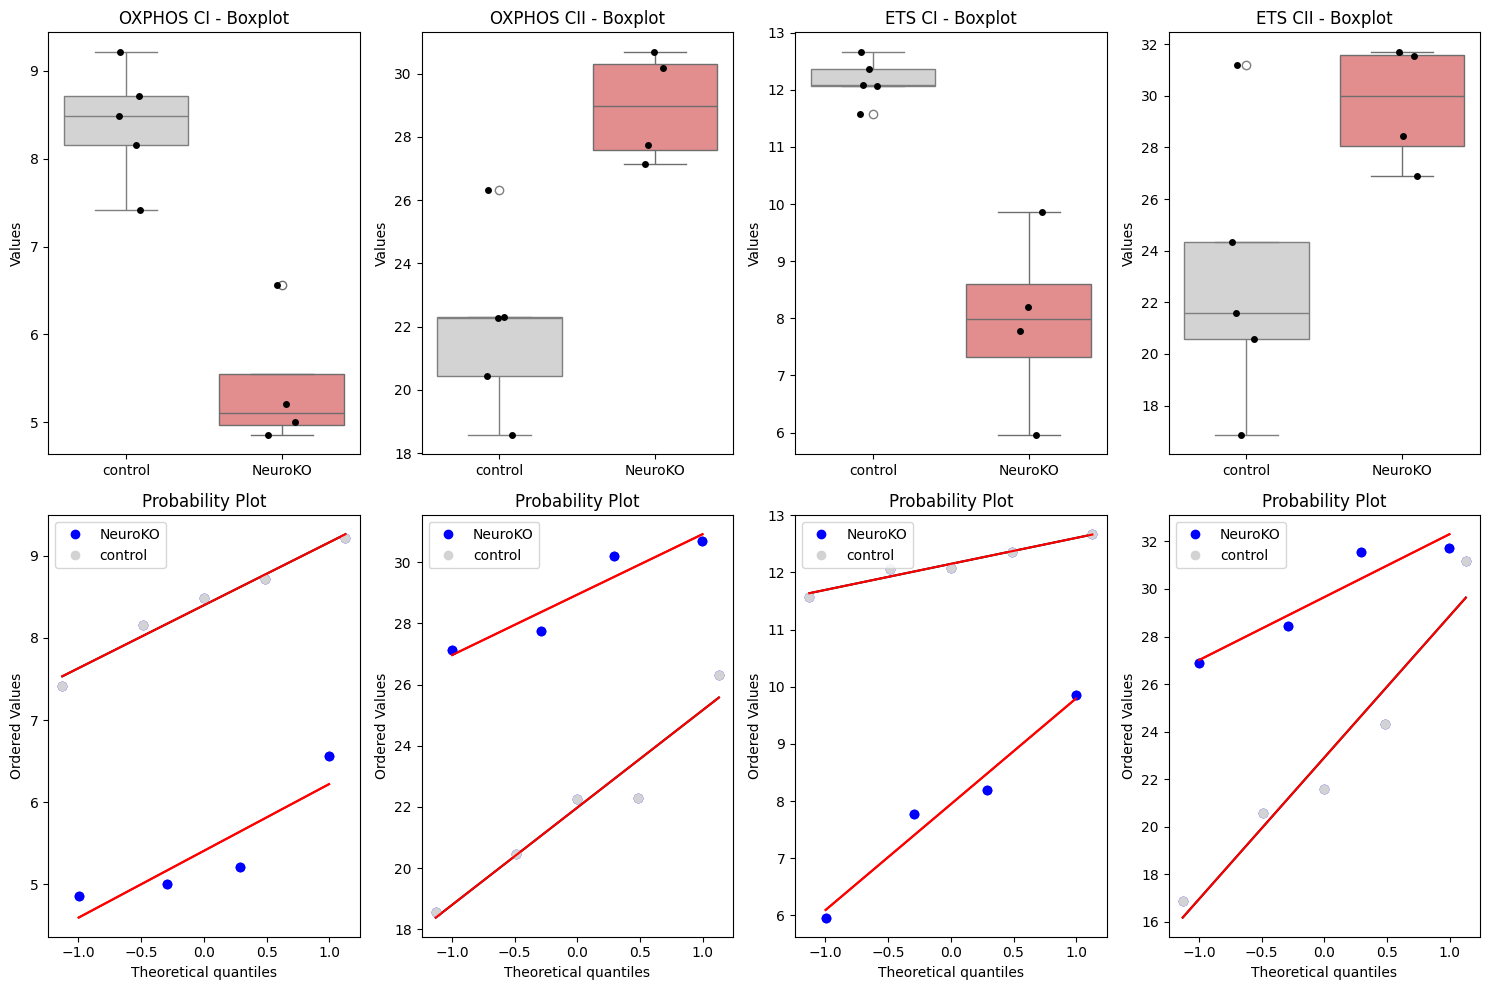

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.power import TTestIndPower

# Data: Store experimental conditions as keys, and datasets as values (lists of lists or arrays)
conditions = {
    "OXPHOS CI": {
        "control": [7.4124, 8.7167, 8.1508, 9.2188, 8.4869],
        "NeuroKO": [6.5585, 5.21195, 4.8573, 5.001533],
    },
    "OXPHOS CII": {
        "control": [22.2725, 22.295, 26.3073, 18.5812, 20.4522],
        "NeuroKO": [27.1323, 27.73765, 30.1869, 30.700167],
    },
    "ETS CI": {
        "control": [12.3585, 11.5775, 12.0661, 12.0776, 12.6689],
        "NeuroKO": [5.9616, 7.7731, 9.8539, 8.1896],
    },
    "ETS CII": {
        "control": [16.8635, 24.3276, 31.1911, 20.5645, 21.5932],
        "NeuroKO": [28.4625, 26.8805, 31.5634, 31.7191],
    }
}

# Set up figure for plotting
num_conditions = len(conditions)
fig, axes = plt.subplots(nrows=2, ncols=num_conditions, figsize=(15, 10))

# Helper function to print statistics
def print_stats(label, data):
    stats_dict = {
        "Mean": np.mean(data),
        "Median": np.median(data),
        "IQR": np.percentile(data, 75) - np.percentile(data, 25),
        "Range": np.ptp(data),
        "Standard Deviation": np.std(data, ddof=1),
        "Skewness": stats.skew(data),
    }

    print(f"\n{label}:")
    for k, v in stats_dict.items():
        print(f"{k}: {v:.4f}")

    return stats.shapiro(data)  # Return the result of Shapiro-Wilk test

# Helper function to run statistical tests
def run_statistical_tests(control_data, neuroKO_data, condition_name):
    # Levene's test for equality of variances
    levene_stat, levene_p = stats.levene(control_data, neuroKO_data)
    print(f"Levene's test p-value comparing control vs NeuroKO for {condition_name}: {levene_p:.4f}")

    # Choose test based on normality and variance equality
    if levene_p >= 0.05:  # If variances are equal
        t_stat, t_p = stats.ttest_ind(control_data, neuroKO_data)
        print(f"t-test p-value comparing control vs NeuroKO for {condition_name}: {t_p:.4f}")
    else:  # If variances are unequal
        t_stat, t_p = stats.ttest_ind(control_data, neuroKO_data, equal_var=False)
        print(f"Welch's t-test p-value comparing control vs NeuroKO for {condition_name}: {t_p:.4f}")

    # Calculate Cohen's d for effect size
    cohen_d = (np.mean(control_data) - np.mean(neuroKO_data)) / np.sqrt(((np.std(control_data) ** 2) + (np.std(neuroKO_data) ** 2)) / 2)
    print(f"Cohen's d for control vs NeuroKO comparison in {condition_name}: {cohen_d:.4f}")

# Iterate over conditions
for i, (condition_name, condition_data) in enumerate(conditions.items()):
    print(f"\nDescriptive Statistics for {condition_name}:")

    # Iterate over datasets (control vs NeuroKO)
    for label, data in condition_data.items():
        # Print descriptive statistics and return Shapiro-Wilk p-value
        shapiro_stat, shapiro_p = print_stats(label, data)

        # Normality check
        print(f"Shapiro-Wilk test p-value: {shapiro_p:.4f}")
        if shapiro_p < 0.05:
            print("Data is not normally distributed. Non-parametric test may be needed.")
        else:
            print("Data is normally distributed. Parametric test can be considered.")

        # Q-Q Plot for control and NeuroKO
        res = stats.probplot(data, dist="norm", plot=axes[1, i])
        if label == "control":
            res_cc = stats.probplot(condition_data["control"], dist="norm", plot=axes[1, i])
            axes[1, i].get_lines()[1].set_color('black')       # Color for reference line
            axes[1, i].get_lines()[2].set_color('lightgrey')    # Color for NeuroKO datapoints
            axes[1, i].get_lines()[2].set_label("control")

        if label == "NeuroKO":
            res_kk = stats.probplot(condition_data["NeuroKO"], dist="norm", plot=axes[1, i])
            axes[1, i].get_lines()[1].set_color('black')     # Color for reference line
            axes[1, i].get_lines()[0].set_color('blue')  # Color for NeuroKO datapoints
            axes[1, i].get_lines()[0].set_label("NeuroKO")


        # Boxplot
        if label == "control":
            sns.boxplot(x=np.repeat(label, len(data)), y=data, ax=axes[0, i], whis=1.5, color='lightgrey')  # Grey boxplot for control
            sns.stripplot(x=np.repeat(label, len(data)), y=data, color='black', jitter=True, ax=axes[0, i])
            axes[0, i].set_title(f"{condition_name} - Boxplot")
            axes[0, i].set_ylabel("Values")
        if label == "NeuroKO":
            sns.boxplot(x=np.repeat(label, len(data)), y=data, ax=axes[0, i], whis=1.5, color='lightcoral')  # Red boxplot for NeuroKO
            sns.stripplot(x=np.repeat(label, len(data)), y=data, color='black', jitter=True, ax=axes[0, i])
            axes[0, i].set_title(f"{condition_name} - Boxplot")
            axes[0, i].set_ylabel("Values")

        # Add legend for both control and NeuroKO
        axes[1, i].legend(loc='best')

    # Add space after each condition
    print("\n")

    # Compare control vs NeuroKO
    control_data = condition_data["control"]
    neuroKO_data = condition_data["NeuroKO"]

    # Run Levene's test, t-test/Welch's t-test, and Cohen's d
    run_statistical_tests(control_data, neuroKO_data, condition_name)

    # Add space after each condition
    print("\n" + "-"*50 + "\n")

# Adjust layout
plt.tight_layout()
plt.show()

Power analysis:

In [ ]:
import numpy as np
from statsmodels.stats.power import TTestIndPower
import scipy.stats as stats

# Dataset with "control" and "NeuroKO" data
conditions = {
    "OXPHOS CI": {
        "control": [7.4124, 8.7167, 8.1508, 9.2188, 8.4869],
        "NeuroKO": [6.5585, 5.21195, 4.8573, 5.001533],
    },
    "OXPHOS CII": {
        "control": [22.2725, 22.295, 26.3073, 18.5812, 20.4522],
        "NeuroKO": [27.1323, 27.73765, 30.1869, 30.700167],
    },
    "ETS CI": {
        "control": [12.3585, 11.5775, 12.0661, 12.0776, 12.6689],
        "NeuroKO": [5.9616, 7.7731, 9.8539, 8.1896],
    },
    "ETS CII": {
        "control": [16.8635, 24.3276, 31.1911, 20.5645, 21.5932],
        "NeuroKO": [28.4625, 26.8805, 31.5634, 31.7191],
    },
}

# Function to calculate effect size (Cohen's d)
def calculate_effect_size(control_data, experimental_data):
    mean_control = np.mean(control_data)
    mean_experimental = np.mean(experimental_data)
    std_control = np.std(control_data, ddof=1)
    std_experimental = np.std(experimental_data, ddof=1)

    pooled_std = np.sqrt(((std_control ** 2) + (std_experimental ** 2)) / 2)
    effect_size = (mean_control - mean_experimental) / pooled_std
    return effect_size

# Perform power analysis for each condition
def power_analysis(control_data, experimental_data, alpha=0.05, power=0.80):
    # Calculate effect size
    effect_size = calculate_effect_size(control_data, experimental_data)
    print(f"Cohen's d (Effect Size): {effect_size:.4f}")

    # Power analysis using statsmodels TTestIndPower
    power_analysis = TTestIndPower()
    required_sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')

    return np.ceil(required_sample_size)

# Perform power analysis for each condition
for condition_name, data in conditions.items():
    print(f"\nPower Analysis for {condition_name}:")
    control_data = data["control"]
    experimental_data = data["NeuroKO"]

    required_sample_size = power_analysis(control_data, experimental_data)
    print(f"Required sample size for 80% power at α = 0.05: {required_sample_size:.0f}")
    print("-" * 50)


Power Analysis for OXPHOS CI:
Cohen's d (Effect Size): 4.0989
Required sample size for 80% power at α = 0.05: 3
--------------------------------------------------

Power Analysis for OXPHOS CII:
Cohen's d (Effect Size): -2.9243
Required sample size for 80% power at α = 0.05: 4
--------------------------------------------------

Power Analysis for ETS CI:
Cohen's d (Effect Size): 3.6066
Required sample size for 80% power at α = 0.05: 3
--------------------------------------------------

Power Analysis for ETS CII:
Cohen's d (Effect Size): -1.6303
Required sample size for 80% power at α = 0.05: 8
--------------------------------------------------


# NeuroKO_Astrocytic Respiration


Descriptive Statistics for OXPHOS CI:

Control:
Mean: 4.3771
Median: 3.4188
IQR: 1.3842
Range: 5.1219
Standard Deviation: 2.1609
Skewness: 1.2653
Shapiro-Wilk test p-value: 0.0286
Data is not normally distributed. Non-parametric test may be needed.

NeuroKO:
Mean: 4.2382
Median: 4.0857
IQR: 0.6190
Range: 1.5480
Standard Deviation: 0.6681
Skewness: 0.6790
Shapiro-Wilk test p-value: 0.5890
Data is normally distributed. Parametric test can be considered.


Levene's test p-value comparing control vs NeuroKO for OXPHOS CI: 0.4277
t-test p-value comparing control vs NeuroKO for OXPHOS CI: 0.9060
Cohen's d for control vs NeuroKO comparison in OXPHOS CI: 0.0974

--------------------------------------------------


Descriptive Statistics for OXPHOS CII:

Control:
Mean: 13.1423
Median: 13.0729
IQR: 1.9451
Range: 3.0793
Standard Deviation: 1.2934
Skewness: -0.0818
Shapiro-Wilk test p-value: 0.7093
Data is normally distributed. Parametric test can be considered.

NeuroKO:
Mean: 12.0980
Median: 12

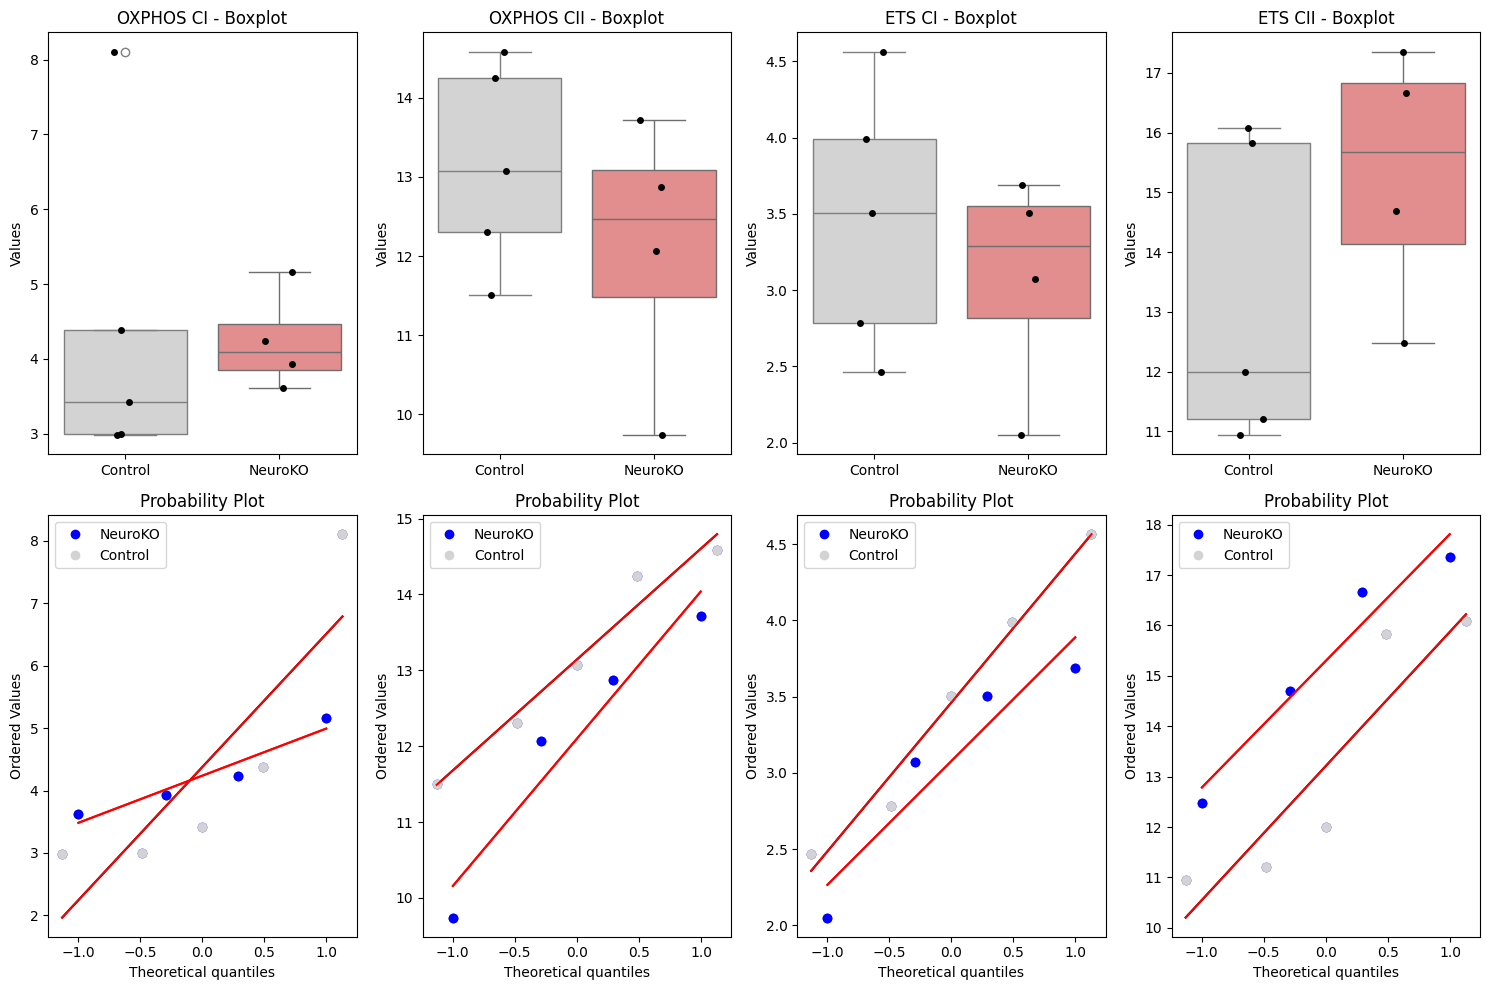

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.power import TTestIndPower

# Data: Store experimental conditions as keys, and datasets as values (lists of lists or arrays)
conditions = {
    "OXPHOS CI": {
        "Control": [2.9951, 2.9852, 3.4188, 4.3793, 8.1071],
        "NeuroKO": [3.6166, 5.1646, 4.2404, 3.9311],
    },
    "OXPHOS CII": {
        "Control": [13.0729, 11.5052, 14.5845, 14.2469, 12.3018],
        "NeuroKO": [9.7405, 12.8741, 12.0627, 13.7146],
    },
    "ETS CI": {
        "Control": [2.7848, 3.5069, 2.4651, 4.564, 3.988],
        "NeuroKO": [3.0702, 3.5024, 3.6864, 2.0514],
    },
    "ETS CII": {
        "Control": [10.9423, 11.9952, 11.2105, 16.0813, 15.8336],
        "NeuroKO": [14.6921, 16.661, 12.4816, 17.3578],
    }
}

# Set up figure for plotting
num_conditions = len(conditions)
fig, axes = plt.subplots(nrows=2, ncols=num_conditions, figsize=(15, 10))

# Helper function to print statistics
def print_stats(label, data):
    stats_dict = {
        "Mean": np.mean(data),
        "Median": np.median(data),
        "IQR": np.percentile(data, 75) - np.percentile(data, 25),
        "Range": np.ptp(data),
        "Standard Deviation": np.std(data, ddof=1),
        "Skewness": stats.skew(data),
    }

    print(f"\n{label}:")
    for k, v in stats_dict.items():
        print(f"{k}: {v:.4f}")

    return stats.shapiro(data)  # Return the result of Shapiro-Wilk test

# Helper function to run statistical tests
def run_statistical_tests(control_data, neuroKO_data, condition_name):
    # Levene's test for equality of variances
    levene_stat, levene_p = stats.levene(control_data, neuroKO_data)
    print(f"Levene's test p-value comparing control vs NeuroKO for {condition_name}: {levene_p:.4f}")

    # Choose test based on normality and variance equality
    if levene_p >= 0.05:  # If variances are equal
        t_stat, t_p = stats.ttest_ind(control_data, neuroKO_data)
        print(f"t-test p-value comparing control vs NeuroKO for {condition_name}: {t_p:.4f}")
    else:  # If variances are unequal
        t_stat, t_p = stats.ttest_ind(control_data, neuroKO_data, equal_var=False)
        print(f"Welch's t-test p-value comparing control vs NeuroKO for {condition_name}: {t_p:.4f}")

    # Calculate Cohen's d for effect size
    cohen_d = (np.mean(control_data) - np.mean(neuroKO_data)) / np.sqrt(((np.std(control_data) ** 2) + (np.std(neuroKO_data) ** 2)) / 2)
    print(f"Cohen's d for control vs NeuroKO comparison in {condition_name}: {cohen_d:.4f}")

# Iterate over conditions
for i, (condition_name, condition_data) in enumerate(conditions.items()):
    print(f"\nDescriptive Statistics for {condition_name}:")

    # Iterate over datasets (Control vs NeuroKO)
    for label, data in condition_data.items():
        # Print descriptive statistics and return Shapiro-Wilk p-value
        shapiro_stat, shapiro_p = print_stats(label, data)

        # Normality check
        print(f"Shapiro-Wilk test p-value: {shapiro_p:.4f}")
        if shapiro_p < 0.05:
            print("Data is not normally distributed. Non-parametric test may be needed.")
        else:
            print("Data is normally distributed. Parametric test can be considered.")

        # Q-Q Plot for control and NeuroKO
        res = stats.probplot(data, dist="norm", plot=axes[1, i])
        if label == "Control":
            res_cc = stats.probplot(condition_data["Control"], dist="norm", plot=axes[1, i])
            axes[1, i].get_lines()[1].set_color('black')       # Color for reference line
            axes[1, i].get_lines()[2].set_color('lightgrey')    # Color for NeuroKO datapoints
            axes[1, i].get_lines()[2].set_label("Control")

        if label == "NeuroKO":
            res_kk = stats.probplot(condition_data["NeuroKO"], dist="norm", plot=axes[1, i])
            axes[1, i].get_lines()[1].set_color('black')     # Color for reference line
            axes[1, i].get_lines()[0].set_color('blue')  # Color for NeuroKO datapoints
            axes[1, i].get_lines()[0].set_label("NeuroKO")


        # Boxplot
        if label == "Control":
            sns.boxplot(x=np.repeat(label, len(data)), y=data, ax=axes[0, i], whis=1.5, color='lightgrey')  # Grey boxplot for control
            sns.stripplot(x=np.repeat(label, len(data)), y=data, color='black', jitter=True, ax=axes[0, i])
            axes[0, i].set_title(f"{condition_name} - Boxplot")
            axes[0, i].set_ylabel("Values")
        if label == "NeuroKO":
            sns.boxplot(x=np.repeat(label, len(data)), y=data, ax=axes[0, i], whis=1.5, color='lightcoral')  # Red boxplot for NeuroKO
            sns.stripplot(x=np.repeat(label, len(data)), y=data, color='black', jitter=True, ax=axes[0, i])
            axes[0, i].set_title(f"{condition_name} - Boxplot")
            axes[0, i].set_ylabel("Values")

        # Add legend for both control and NeuroKO
        axes[1, i].legend(loc='best')

    # Add space after each condition
    print("\n")

    # Compare control vs NeuroKO
    control_data = condition_data["Control"]
    neuroKO_data = condition_data["NeuroKO"]

    # Run Levene's test, t-test/Welch's t-test, and Cohen's d
    run_statistical_tests(control_data, neuroKO_data, condition_name)

    # Add space after each condition
    print("\n" + "-"*50 + "\n")

# Adjust layout
plt.tight_layout()
plt.show()

Power analysis:

In [ ]:
import numpy as np
from statsmodels.stats.power import TTestIndPower

# Dataset
conditions = {
    "OXPHOS CI": {
        "Control": [2.9951, 2.9852, 3.4188, 4.3793, 8.1071],
        "NeuroKO": [3.6166, 5.1646, 4.2404, 3.9311],
    },
    "OXPHOS CII": {
        "Control": [13.0729, 11.5052, 14.5845, 14.2469, 12.3018],
        "NeuroKO": [9.7405, 12.8741, 12.0627, 13.7146],
    },
    "ETS CI": {
        "Control": [2.7848, 3.5069, 2.4651, 4.564, 3.988],
        "NeuroKO": [3.0702, 3.5024, 3.6864, 2.0514],
    },
    "ETS CII": {
        "Control": [10.9423, 11.9952, 11.2105, 16.0813, 15.8336],
        "NeuroKO": [14.6921, 16.661, 12.4816, 17.3578],
    },
}

# Power analysis
def power_analysis(control_data, neuroKO_data, alpha=0.05, power=0.80):
    # Calculate effect size
    effect_size = (np.mean(control_data) - np.mean(neuroKO_data)) / np.sqrt(((np.std(control_data, ddof=1)**2 + np.std(neuroKO_data, ddof=1)**2) / 2))

    # Calculate required sample size
    required_n = TTestIndPower().solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')

    return effect_size, np.ceil(required_n)

# Display results
for condition, data in conditions.items():
    control_data = data["Control"]
    neuroKO_data = data["NeuroKO"]

    effect_size, n_required = power_analysis(control_data, neuroKO_data)
    print(f"{condition}:")
    print(f"  Effect size: {effect_size:.4f}")
    print(f"  {n_required} subjects needed for 80% power at α = 0.05\n")

OXPHOS CI:
  Effect size: 0.0869
  2082.0 subjects needed for 80% power at α = 0.05

OXPHOS CII:
  Effect size: 0.6887
  35.0 subjects needed for 80% power at α = 0.05

ETS CI:
  Effect size: 0.4819
  69.0 subjects needed for 80% power at α = 0.05

ETS CII:
  Effect size: -0.8799
  22.0 subjects needed for 80% power at α = 0.05



# AstKO_Neuronal Respiration


Descriptive Statistics for OXPHOS_CI:

AstControl:
Mean: 15.0460
Median: 13.4943
IQR: 4.8411
Range: 12.7287
Standard Deviation: 5.0310
Skewness: 0.7786
Shapiro-Wilk test p-value: 0.5025
Data is normally distributed. Parametric test can be considered.

AstKO:
Mean: 8.8314
Median: 8.4675
IQR: 2.1079
Range: 6.4318
Standard Deviation: 2.4583
Skewness: 0.6693
Shapiro-Wilk test p-value: 0.7131
Data is normally distributed. Parametric test can be considered.


Levene's test p-value comparing AstControl vs AstKO for OXPHOS_CI: 0.3343
t-test p-value comparing AstControl vs AstKO for OXPHOS_CI: 0.0380
Cohen's d for AstControl vs AstKO comparison in OXPHOS_CI: 1.7548
Required sample size per group for 80% power (alpha = 0.05): 7

--------------------------------------------------


Descriptive Statistics for OXPHOS_CII:

AstControl:
Mean: 22.8534
Median: 23.0709
IQR: 4.1089
Range: 13.4395
Standard Deviation: 5.0096
Skewness: -0.3788
Shapiro-Wilk test p-value: 0.9405
Data is normally distributed.

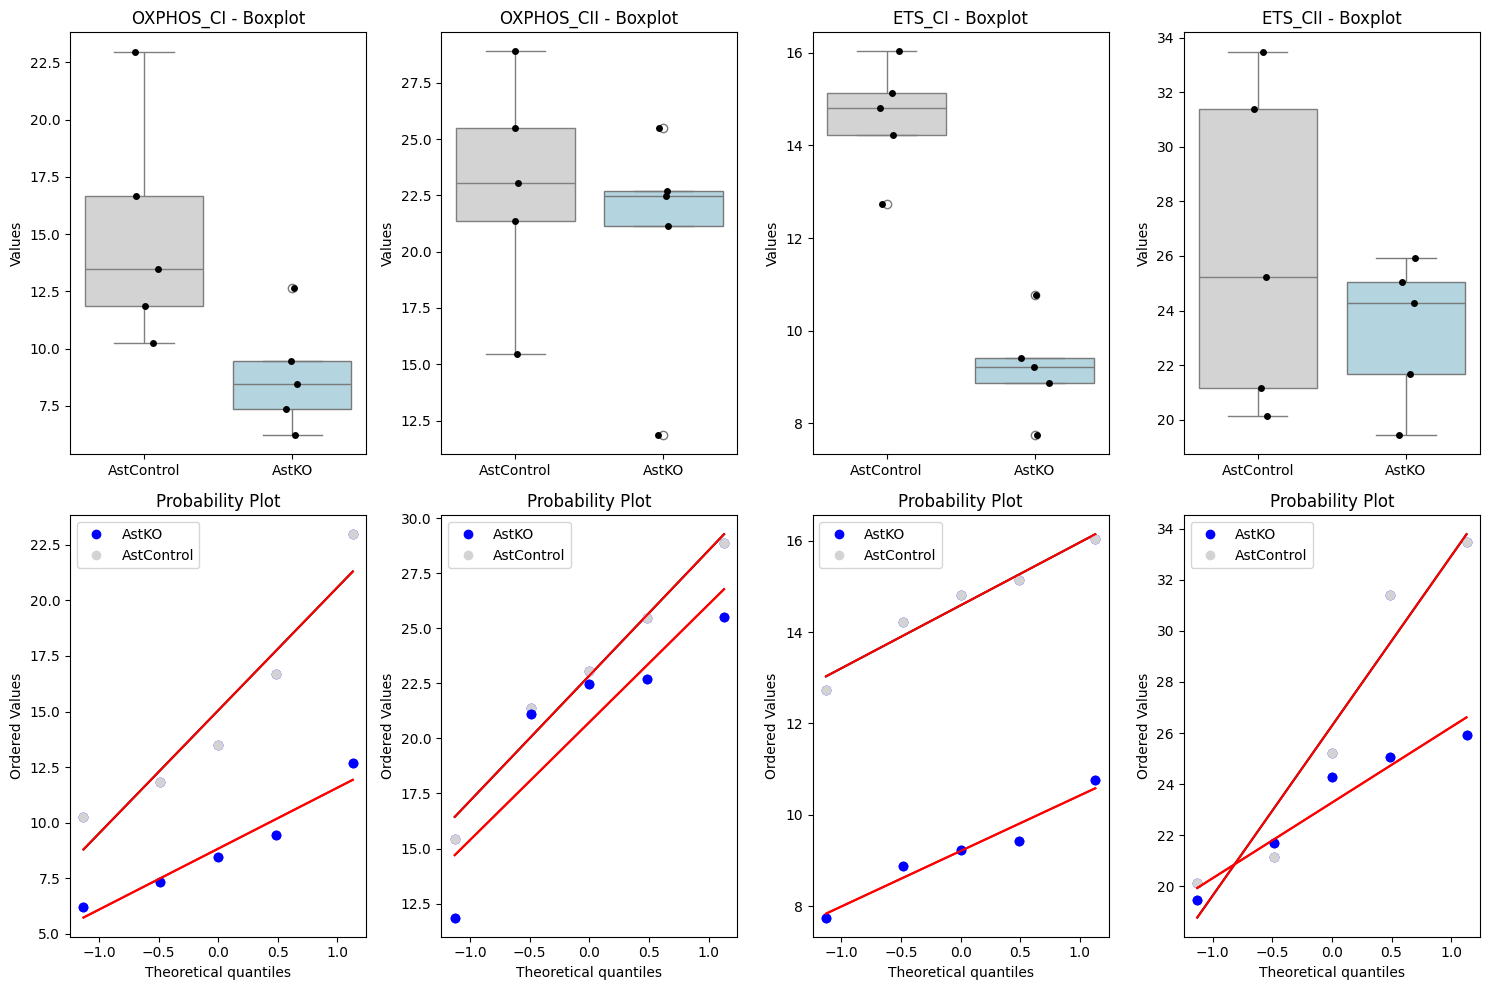

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.power import TTestIndPower

# Data: Store experimental conditions as keys, and datasets as values (lists of lists or arrays)
conditions = {
    "OXPHOS_CI": {
        "AstControl": [22.9715, 16.6813, 13.4943, 10.2428, 11.8402],
        "AstKO": [9.4516, 7.3437, 6.2313, 8.4675, 12.6631],
    },
    "OXPHOS_CII": {
        "AstControl": [28.8916, 15.4521, 25.4806, 21.3717, 23.0709],
        "AstKO": [22.714, 11.8665, 21.1263, 22.4896, 25.4905],
    },
    "ETS_CI": {
        "AstControl": [15.1351, 14.8068, 12.7343, 16.0272, 14.2226],
        "AstKO": [8.8801, 7.7543, 9.421, 10.772, 9.2281],
    },
    "ETS_CII": {
        "AstControl": [33.4987, 21.1418, 31.4046, 20.1169, 25.2332],
        "AstKO": [25.9098, 19.4414, 25.0541, 21.6761, 24.2742],
    }
}

# Set up figure for plotting
num_conditions = len(conditions)
fig, axes = plt.subplots(nrows=2, ncols=num_conditions, figsize=(15, 10))

# Helper function to print statistics
def print_stats(label, data):
    stats_dict = {
        "Mean": np.mean(data),
        "Median": np.median(data),
        "IQR": np.percentile(data, 75) - np.percentile(data, 25),
        "Range": np.ptp(data),
        "Standard Deviation": np.std(data, ddof=1),
        "Skewness": stats.skew(data),
    }

    print(f"\n{label}:")
    for k, v in stats_dict.items():
        print(f"{k}: {v:.4f}")

    return stats.shapiro(data)  # Return the result of Shapiro-Wilk test

# Helper function to run statistical tests
def run_statistical_tests(control_data, astKO_data, condition_name):
    # Levene's test for equality of variances
    levene_stat, levene_p = stats.levene(control_data, astKO_data)
    print(f"Levene's test p-value comparing AstControl vs AstKO for {condition_name}: {levene_p:.4f}")

    # Choose test based on normality and variance equality
    if levene_p >= 0.05:  # If variances are equal
        t_stat, t_p = stats.ttest_ind(control_data, astKO_data)
        print(f"t-test p-value comparing AstControl vs AstKO for {condition_name}: {t_p:.4f}")
    else:  # If variances are unequal
        t_stat, t_p = stats.ttest_ind(control_data, astKO_data, equal_var=False)
        print(f"Welch's t-test p-value comparing AstControl vs AstKO for {condition_name}: {t_p:.4f}")

    # Calculate Cohen's d for effect size
    cohen_d = (np.mean(control_data) - np.mean(astKO_data)) / np.sqrt(((np.std(control_data) ** 2) + (np.std(astKO_data) ** 2)) / 2)
    print(f"Cohen's d for AstControl vs AstKO comparison in {condition_name}: {cohen_d:.4f}")

    # Perform power analysis to find required sample size
    alpha = 0.05  # Significance level
    power = 0.80  # Desired power
    analysis = TTestIndPower()
    required_n = analysis.solve_power(effect_size=cohen_d, alpha=alpha, power=power, alternative='two-sided')
    print(f"Required sample size per group for 80% power (alpha = {alpha}): {np.ceil(required_n):.0f}")

# Iterate over conditions
for i, (condition_name, condition_data) in enumerate(conditions.items()):
    print(f"\nDescriptive Statistics for {condition_name}:")

    # Iterate over datasets (AstControl vs AstKO)
    for label, data in condition_data.items():
        # Print descriptive statistics and return Shapiro-Wilk p-value
        shapiro_stat, shapiro_p = print_stats(label, data)

        # Normality check
        print(f"Shapiro-Wilk test p-value: {shapiro_p:.4f}")
        if shapiro_p < 0.05:
            print("Data is not normally distributed. Non-parametric test may be needed.")
        else:
            print("Data is normally distributed. Parametric test can be considered.")

        # Q-Q Plot for AstControl and AstKO
        res = stats.probplot(data, dist="norm", plot=axes[1, i])
        if label == "AstControl":
            res_cc = stats.probplot(condition_data["AstControl"], dist="norm", plot=axes[1, i])
            axes[1, i].get_lines()[1].set_color('black')       # Color for reference line
            axes[1, i].get_lines()[2].set_color('lightgrey')    # Color for AstKO datapoints
            axes[1, i].get_lines()[2].set_label("AstControl")

        if label == "AstKO":
            res_kk = stats.probplot(condition_data["AstKO"], dist="norm", plot=axes[1, i])
            axes[1, i].get_lines()[1].set_color('black')     # Color for reference line
            axes[1, i].get_lines()[0].set_color('blue')  # Color for AstKO datapoints
            axes[1, i].get_lines()[0].set_label("AstKO")

        # Boxplot
        if label == "AstControl":
            sns.boxplot(x=np.repeat(label, len(data)), y=data, ax=axes[0, i], whis=1.5, color='lightgrey')  # Grey boxplot for AstControl
            sns.stripplot(x=np.repeat(label, len(data)), y=data, color='black', jitter=True, ax=axes[0, i])
            axes[0, i].set_title(f"{condition_name} - Boxplot")
            axes[0, i].set_ylabel("Values")
        if label == "AstKO":
            sns.boxplot(x=np.repeat(label, len(data)), y=data, ax=axes[0, i], whis=1.5, color='lightblue')  # Blue boxplot for AstKO
            sns.stripplot(x=np.repeat(label, len(data)), y=data, color='black', jitter=True, ax=axes[0, i])
            axes[0, i].set_title(f"{condition_name} - Boxplot")
            axes[0, i].set_ylabel("Values")

        # Add legend for both AstControl and AstKO
        axes[1, i].legend(loc='best')

    # Add space after each condition
    print("\n")

    # Compare AstControl vs AstKO
    control_data = condition_data["AstControl"]
    astKO_data = condition_data["AstKO"]

    # Run Levene's test, t-test/Welch's t-test, and Cohen's d
    run_statistical_tests(control_data, astKO_data, condition_name)

    # Add space after each condition
    print("\n" + "-"*50 + "\n")

# Adjust layout
plt.tight_layout()
plt.show()

# AstKO_Astrocytic Respiration


Descriptive Statistics for OXPHOS_CI:

AstControl:
Mean: 5.9324
Median: 6.2563
IQR: 0.3387
Range: 3.0680
Standard Deviation: 1.1326
Skewness: -0.8802
Shapiro-Wilk test p-value: 0.2940
Data is normally distributed. Parametric test can be considered.

AstKO:
Mean: 1.9995
Median: 1.9256
IQR: 1.2641
Range: 1.7319
Standard Deviation: 0.7592
Skewness: 0.0839
Shapiro-Wilk test p-value: 0.5282
Data is normally distributed. Parametric test can be considered.


Levene's test p-value comparing AstControl vs AstKO for OXPHOS_CI: 0.8566
t-test p-value comparing AstControl vs AstKO for OXPHOS_CI: 0.0002
Cohen's d for AstControl vs AstKO comparison in OXPHOS_CI: 4.5605
Required sample size per group for 80% power (alpha = 0.05): 3

--------------------------------------------------


Descriptive Statistics for OXPHOS_CII:

AstControl:
Mean: 12.0541
Median: 11.7728
IQR: 0.7792
Range: 3.7017
Standard Deviation: 1.4095
Skewness: 0.9794
Shapiro-Wilk test p-value: 0.3212
Data is normally distributed. Par

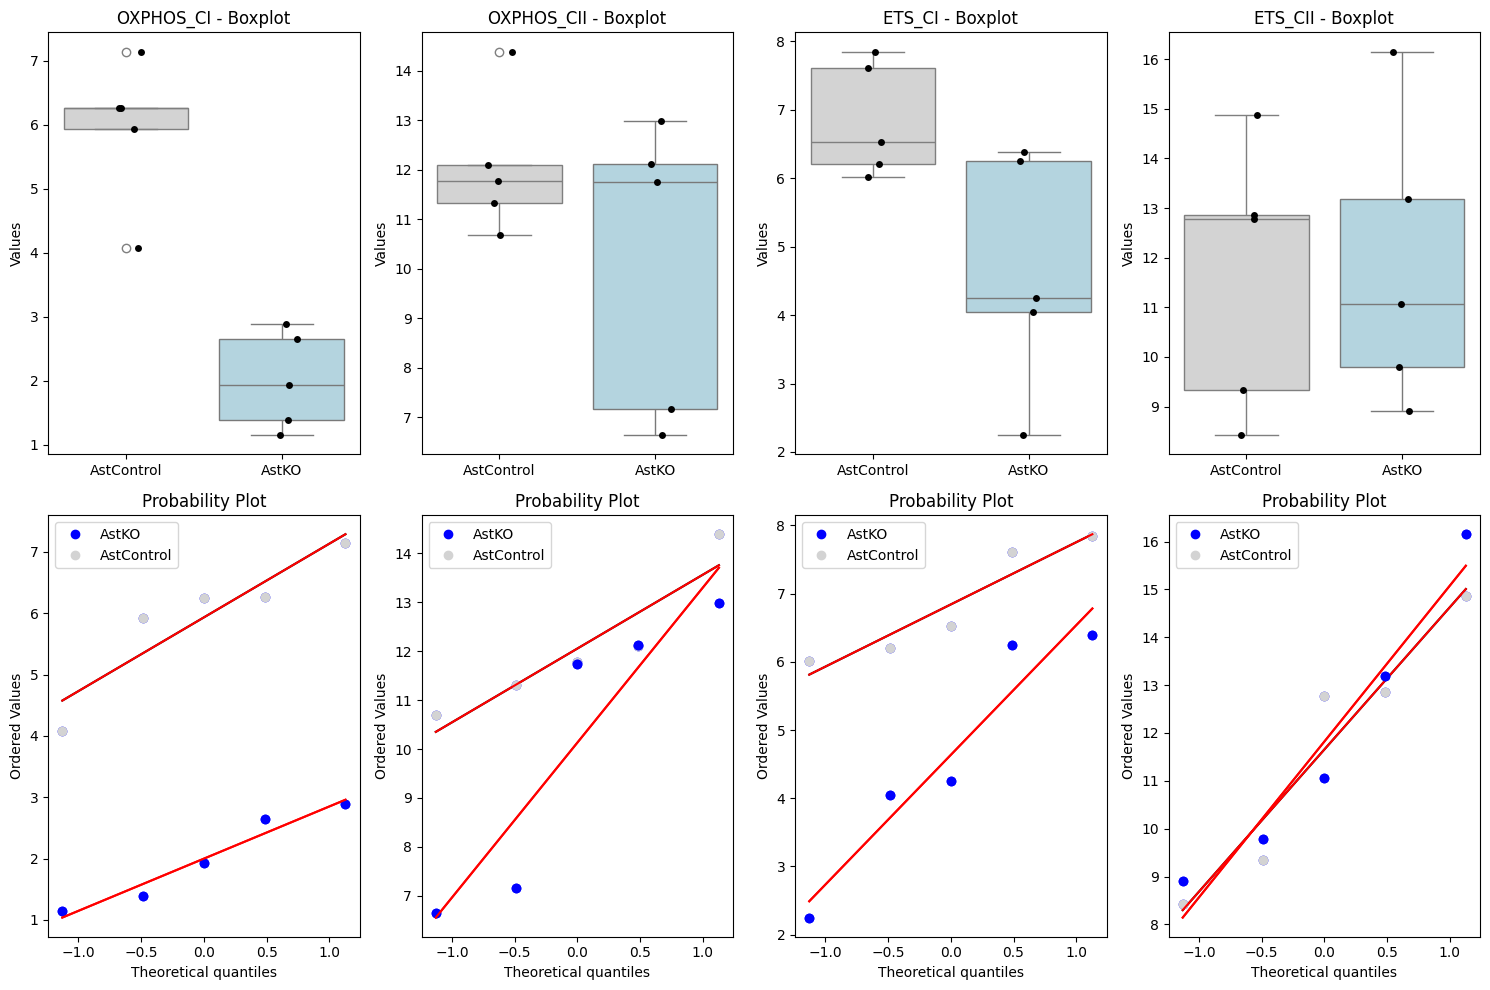

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.power import TTestIndPower

# Data: Store experimental conditions as keys, and datasets as values (lists of lists or arrays)
conditions = {
    "OXPHOS_CI": {
        "AstControl": [6.2641, 7.1422, 5.9254, 4.0742, 6.2563],
        "AstKO": [1.1541, 1.3839, 1.9256, 2.648, 2.88602],
    },
    "OXPHOS_CII": {
        "AstControl": [12.0978, 11.3186, 11.7728, 10.6899, 14.3916],
        "AstKO": [12.9851, 7.1645, 6.641, 11.7454, 12.11718],
    },
    "ETS_CI": {
        "AstControl": [6.5317, 7.6137, 7.84908, 6.1995, 6.0174],
        "AstKO": [6.253, 2.2503, 4.0422, 4.2461, 6.3868],
    },
    "ETS_CII": {
        "AstControl": [12.7716, 12.8551, 8.43012, 9.3404, 14.8699],
        "AstKO": [11.0588, 8.9027, 9.7904, 16.1545, 13.1892],
    }
}

# Set up figure for plotting
num_conditions = len(conditions)
fig, axes = plt.subplots(nrows=2, ncols=num_conditions, figsize=(15, 10))

# Helper function to print statistics
def print_stats(label, data):
    stats_dict = {
        "Mean": np.mean(data),
        "Median": np.median(data),
        "IQR": np.percentile(data, 75) - np.percentile(data, 25),
        "Range": np.ptp(data),
        "Standard Deviation": np.std(data, ddof=1),
        "Skewness": stats.skew(data),
    }

    print(f"\n{label}:")
    for k, v in stats_dict.items():
        print(f"{k}: {v:.4f}")

    return stats.shapiro(data)  # Return the result of Shapiro-Wilk test

# Helper function to run statistical tests
def run_statistical_tests(control_data, astKO_data, condition_name):
    # Levene's test for equality of variances
    levene_stat, levene_p = stats.levene(control_data, astKO_data)
    print(f"Levene's test p-value comparing AstControl vs AstKO for {condition_name}: {levene_p:.4f}")

    # Choose test based on normality and variance equality
    if levene_p >= 0.05:  # If variances are equal
        t_stat, t_p = stats.ttest_ind(control_data, astKO_data)
        print(f"t-test p-value comparing AstControl vs AstKO for {condition_name}: {t_p:.4f}")
    else:  # If variances are unequal
        t_stat, t_p = stats.ttest_ind(control_data, astKO_data, equal_var=False)
        print(f"Welch's t-test p-value comparing AstControl vs AstKO for {condition_name}: {t_p:.4f}")

    # Calculate Cohen's d for effect size
    cohen_d = (np.mean(control_data) - np.mean(astKO_data)) / np.sqrt(((np.std(control_data) ** 2) + (np.std(astKO_data) ** 2)) / 2)
    print(f"Cohen's d for AstControl vs AstKO comparison in {condition_name}: {cohen_d:.4f}")

    # Perform power analysis to find required sample size
    alpha = 0.05  # Significance level
    power = 0.80  # Desired power
    analysis = TTestIndPower()
    required_n = analysis.solve_power(effect_size=cohen_d, alpha=alpha, power=power, alternative='two-sided')
    print(f"Required sample size per group for 80% power (alpha = {alpha}): {np.ceil(required_n):.0f}")

# Iterate over conditions
for i, (condition_name, condition_data) in enumerate(conditions.items()):
    print(f"\nDescriptive Statistics for {condition_name}:")

    # Iterate over datasets (AstControl vs AstKO)
    for label, data in condition_data.items():
        # Print descriptive statistics and return Shapiro-Wilk p-value
        shapiro_stat, shapiro_p = print_stats(label, data)

        # Normality check
        print(f"Shapiro-Wilk test p-value: {shapiro_p:.4f}")
        if shapiro_p < 0.05:
            print("Data is not normally distributed. Non-parametric test may be needed.")
        else:
            print("Data is normally distributed. Parametric test can be considered.")

        # Q-Q Plot for AstControl and AstKO
        res = stats.probplot(data, dist="norm", plot=axes[1, i])
        if label == "AstControl":
            res_cc = stats.probplot(condition_data["AstControl"], dist="norm", plot=axes[1, i])
            axes[1, i].get_lines()[1].set_color('black')       # Color for reference line
            axes[1, i].get_lines()[2].set_color('lightgrey')    # Color for AstKO datapoints
            axes[1, i].get_lines()[2].set_label("AstControl")

        if label == "AstKO":
            res_kk = stats.probplot(condition_data["AstKO"], dist="norm", plot=axes[1, i])
            axes[1, i].get_lines()[1].set_color('black')     # Color for reference line
            axes[1, i].get_lines()[0].set_color('blue')  # Color for AstKO datapoints
            axes[1, i].get_lines()[0].set_label("AstKO")

        # Boxplot
        if label == "AstControl":
            sns.boxplot(x=np.repeat(label, len(data)), y=data, ax=axes[0, i], whis=1.5, color='lightgrey')  # Grey boxplot for AstControl
            sns.stripplot(x=np.repeat(label, len(data)), y=data, color='black', jitter=True, ax=axes[0, i])
            axes[0, i].set_title(f"{condition_name} - Boxplot")
            axes[0, i].set_ylabel("Values")
        if label == "AstKO":
            sns.boxplot(x=np.repeat(label, len(data)), y=data, ax=axes[0, i], whis=1.5, color='lightblue')  # Blue boxplot for AstKO
            sns.stripplot(x=np.repeat(label, len(data)), y=data, color='black', jitter=True, ax=axes[0, i])
            axes[0, i].set_title(f"{condition_name} - Boxplot")
            axes[0, i].set_ylabel("Values")

        # Add legend for both AstControl and AstKO
        axes[1, i].legend(loc='best')

    # Add space after each condition
    print("\n")

    # Compare AstControl vs AstKO
    control_data = condition_data["AstControl"]
    astKO_data = condition_data["AstKO"]

    # Run Levene's test, t-test/Welch's t-test, and Cohen's d
    run_statistical_tests(control_data, astKO_data, condition_name)


    # Add space after each condition
    print("\n" + "-"*50 + "\n")

# Adjust layout
plt.tight_layout()
plt.show()

# Neuronal Mito ROS

In [ ]:
import numpy as np
import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower

# Data for AstKO and NeuroKO
data = {
    "CI ROS": {
        "AstKO": [11.1055276, 12.1922111, 12.0791457, 11.8907035, 11.4164573],
        "NeuroKO": [0.37340546, 0.27531083, 0.00080736, 0.13160019],
    },
    "CII ROS": {
        "AstKO": [0.48708288, 0.67814855, 0.26910657, 0.19913886, 0.34983854],
        "NeuroKO": [0.95412844, 1.0, 1.04434251, 1.5351682],
    }
}

# Function to test normality and equality of variances
def check_assumptions(group1, group2):
    # Test for normality using Shapiro-Wilk test
    _, p_normality_group1 = stats.shapiro(group1)
    _, p_normality_group2 = stats.shapiro(group2)

    # Test for equality of variances using Levene's test
    _, p_variance = stats.levene(group1, group2)

    return p_normality_group1, p_normality_group2, p_variance

# Function to perform t-test or Mann-Whitney U test and apply Bonferroni correction
def perform_tests_and_bonferroni(data, alpha=0.05):
    results = {}
    num_tests = len(data)  # Number of comparisons (one for each condition)

    for condition, values in data.items():
        group1 = values["AstKO"]
        group2 = values["NeuroKO"]

        # Check assumptions: Normality and equality of variances
        p_normality_group1, p_normality_group2, p_variance = check_assumptions(group1, group2)

        print(f"\n{condition} - Assumptions tests:")
        print(f"Shapiro-Wilk test for AstKO normality p-value: {p_normality_group1:.4f}")
        print(f"Shapiro-Wilk test for NeuroKO normality p-value: {p_normality_group2:.4f}")
        print(f"Levene's test for equality of variances p-value: {p_variance:.4f}")

        # If normality and equal variance assumptions are met, use t-test
        if p_normality_group1 > 0.05 and p_normality_group2 > 0.05 and p_variance > 0.05:
            # Perform t-test
            t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=True)
            test_type = "t-test"
        else:
            # Use Mann-Whitney U test if assumptions are not met
            u_stat, p_val = stats.mannwhitneyu(group1, group2, alternative='two-sided')
            t_stat, p_val = u_stat, p_val
            test_type = "Mann-Whitney U test"

        results[condition] = {"test": test_type, "t-statistic": t_stat, "p-value": p_val}

        print(f"Test performed: {test_type}")
        print(f"p-value: {p_val:.4f}")

    # Apply Bonferroni correction
    corrected_alpha = alpha / num_tests  # Adjusted alpha for multiple comparisons
    print(f"\nBonferroni adjusted alpha: {corrected_alpha:.4f}")

    # Check significance for each condition after Bonferroni correction
    for condition, result in results.items():
        print(f"\n{condition} - {result['test']}:")
        print(f"t-statistic: {result['t-statistic']:.4f}, p-value: {result['p-value']:.4f}")

        if result["p-value"] < corrected_alpha:
            print("Result is statistically significant after Bonferroni correction.")
        else:
            print("Result is not statistically significant after Bonferroni correction.")

# Run the analysis
perform_tests_and_bonferroni(data)


CI ROS - Assumptions tests:
Shapiro-Wilk test for AstKO normality p-value: 0.5061
Shapiro-Wilk test for NeuroKO normality p-value: 0.9005
Levene's test for equality of variances p-value: 0.1950
Test performed: t-test
p-value: 0.0000

CII ROS - Assumptions tests:
Shapiro-Wilk test for AstKO normality p-value: 0.7363
Shapiro-Wilk test for NeuroKO normality p-value: 0.0424
Levene's test for equality of variances p-value: 0.8930
Test performed: Mann-Whitney U test
p-value: 0.0159

Bonferroni adjusted alpha: 0.0250

CI ROS - t-test:
t-statistic: 47.2172, p-value: 0.0000
Result is statistically significant after Bonferroni correction.

CII ROS - Mann-Whitney U test:
t-statistic: 0.0000, p-value: 0.0159
Result is statistically significant after Bonferroni correction.


Performing 2 tests so new alpha value is (0.05/2)

In [ ]:
import numpy as np
import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower

# Data for each ROS category
data = {
    "Neuronal Mito_CI ROS": {
        "AstControl": [-0.0006, 0.0098, 0.0279, 0.0108, 0.0147],
        "AstKO": [0.1734, 0.1907, 0.1889, 0.1859, 0.17835],
        "NeuroControl": [0.0387, 0.0565, 0.0804, 0.0755, 0.0517],
        "NeuroKO": [-0.01705, -0.0292, -0.0632, -0.047],
    },
    "Neuronal Mito_CII ROS": {
        "AstControl": [0.0127, 0.0062, 0.0057, -0.0015, -0.0037],
        "AstKO": [0.00565, 0.0092, 0.0016, 0.0003, 0.0031],
        "NeuroControl": [-0.009, 0.001, 0.0149, -0.0067, 0.0103],
        "NeuroKO": [-0.0009, 0.0021, 0.005, 0.0371],
    },
    "CI ROS": {
        "AstKO": [11.1055276, 12.1922111, 12.0791457, 11.8907035, 11.4164573],
        "NeuroKO": [0.37340546, 0.27531083, 0.00080736, 0.13160019],
    },
    "CII ROS": {
        "AstKO": [0.48708288, 0.67814855, 0.26910657, 0.19913886, 0.34983854],
        "NeuroKO": [0.95412844, 1.0, 1.04434251, 1.5351682],
    }
}

# List of comparisons
comparisons = [
    ("Neuronal Mito_CI ROS", "AstKO", "AstControl"),
    ("Neuronal Mito_CI ROS", "NeuroKO", "NeuroControl"),
    ("Neuronal Mito_CII ROS", "AstKO", "AstControl"),
    ("Neuronal Mito_CII ROS", "NeuroKO", "NeuroControl"),
    ("CI ROS", "AstKO", "NeuroKO"),
    ("CII ROS", "AstKO", "NeuroKO")
]

# Bonferroni correction
original_alpha = 0.05
num_comparisons = len(comparisons)
bonferroni_alpha = original_alpha / num_comparisons
print(f"Bonferroni Adjusted Alpha: {bonferroni_alpha:.4f}")

# Function to perform t-test and check assumptions
def perform_t_test(data1, data2, comparison_name, group1, group2):
    # Perform Shapiro-Wilk test for normality
    stat1, p1 = stats.shapiro(data1)
    stat2, p2 = stats.shapiro(data2)

    print(f"\nComparison: {group1} vs {group2} in {comparison_name}:")
    print(f"Shapiro-Wilk test p-value for {group1} (normality): {p1:.4f}")
    print(f"Shapiro-Wilk test p-value for {group2} (normality): {p2:.4f}")

    # Initialize p-value variables
    t_p = None
    u_p = None

    # Check normality and perform the appropriate t-test
    if p1 >= 0.05 and p2 >= 0.05:  # Both are normally distributed
        t_stat, t_p = stats.ttest_ind(data1, data2)
        print(f"t-test p-value: {t_p:.4f}")
    else:  # If either data is not normally distributed, use non-parametric test
        u_stat, u_p = stats.mannwhitneyu(data1, data2)
        print(f"Mann-Whitney U test p-value: {u_p:.4f}")

    # Check if p-value is significant after Bonferroni correction
    if t_p is not None and t_p <= bonferroni_alpha:  # If t-test was performed
        print("Statistically significant after Bonferroni correction!")
    elif u_p is not None and u_p <= bonferroni_alpha:  # If Mann-Whitney U test was performed
        print("Statistically significant after Bonferroni correction!")
    else:
        print("Not statistically significant after Bonferroni correction.")

# Perform t-test for all comparisons
for comparison_name, group1, group2 in comparisons:
    data1 = data[comparison_name][group1]
    data2 = data[comparison_name][group2]
    perform_t_test(data1, data2, comparison_name, group1, group2)

Bonferroni Adjusted Alpha: 0.0083

Comparison: AstKO vs AstControl in Neuronal Mito_CI ROS:
Shapiro-Wilk test p-value for AstKO (normality): 0.5061
Shapiro-Wilk test p-value for AstControl (normality): 0.7777
t-test p-value: 0.0000
Statistically significant after Bonferroni correction!

Comparison: NeuroKO vs NeuroControl in Neuronal Mito_CI ROS:
Shapiro-Wilk test p-value for NeuroKO (normality): 0.9005
Shapiro-Wilk test p-value for NeuroControl (normality): 0.6735
t-test p-value: 0.0001
Statistically significant after Bonferroni correction!

Comparison: AstKO vs AstControl in Neuronal Mito_CII ROS:
Shapiro-Wilk test p-value for AstKO (normality): 0.7363
Shapiro-Wilk test p-value for AstControl (normality): 0.6768
t-test p-value: 0.9792
Not statistically significant after Bonferroni correction.

Comparison: NeuroKO vs NeuroControl in Neuronal Mito_CII ROS:
Shapiro-Wilk test p-value for NeuroKO (normality): 0.0424
Shapiro-Wilk test p-value for NeuroControl (normality): 0.5482
Mann-Whitn

# Astrocytic Mito ROS

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.power import TTestIndPower

# Data: Astrocytic ROS Production (Fold change normalized to control)
data = {
    "CI_ROS": {
        "NeuroKO": [0.99798252, 0.80833894, 0.9330195, 0.84263618],
        "AstKO": [0.31790519, 0.16335682, 0.13613069, 0.33872518]
    },
    "CII_ROS": {
        "NeuroKO": [1.29703605, 1.59293781, 1.54510036, 1.26498003],
        "AstKO": [0.47242825, 1.24798452, 1.33666559, 0.93840697]
    }
}

# Helper function to print stats
def print_stats(label, data):
    stats_dict = {
        "Mean": np.mean(data),
        "Median": np.median(data),
        "IQR": np.percentile(data, 75) - np.percentile(data, 25),
        "Range": np.ptp(data),
        "Standard Deviation": np.std(data, ddof=1),
        "Skewness": stats.skew(data),
    }

    print(f"\n{label}:")
    for k, v in stats_dict.items():
        print(f"{k}: {v:.4f}")

    # Shapiro-Wilk test for normality
    return stats.shapiro(data)  # Return the result of Shapiro-Wilk test

# Helper function to run statistical tests
def run_statistical_tests(data1, data2, condition_name):
    # Levene's test for equality of variances
    levene_stat, levene_p = stats.levene(data1, data2)
    print(f"Levene's test p-value for {condition_name}: {levene_p:.4f}")

    # T-test or Welch's test based on normality and variance assumption
    if levene_p >= 0.05:  # Equal variances assumed
        t_stat, t_p = stats.ttest_ind(data1, data2)
        print(f"T-test p-value for {condition_name}: {t_p:.4f}")
    else:  # Unequal variances assumed
        t_stat, t_p = stats.ttest_ind(data1, data2, equal_var=False)
        print(f"Welch's T-test p-value for {condition_name}: {t_p:.4f}")

    # Calculate Cohen's d for effect size
    cohen_d = (np.mean(data1) - np.mean(data2)) / np.sqrt(((np.std(data1) ** 2) + (np.std(data2) ** 2)) / 2)
    print(f"Cohen's d for {condition_name}: {cohen_d:.4f}")

    # Perform power analysis to find required sample size
    alpha = 0.05 / 2  # Bonferroni correction for 2 comparisons
    power = 0.80  # Desired power
    analysis = TTestIndPower()
    required_n = analysis.solve_power(effect_size=cohen_d, alpha=alpha, power=power, alternative='two-sided')
    print(f"Required sample size per group for 80% power (alpha = {alpha}): {np.ceil(required_n):.0f}")


# Adjusted alpha for multiple comparisons (2 comparisons in total)
alpha_adjusted = 0.05 / 2  # Bonferroni correction for 2 comparisons
print(f"Adjusted alpha (Bonferroni): {alpha_adjusted:.4f}\n")

# Perform analysis for each condition (CI_ROS and CII_ROS)
for condition, groups in data.items():
    print(f"\nAnalysis for {condition}:")
    neuroKO_data = groups["NeuroKO"]
    astKO_data = groups["AstKO"]

    # Check normality with Shapiro-Wilk test for both groups
    print(f"Normality test (Shapiro-Wilk) for NeuroKO in {condition}:")
    shapiro_neuroKO = print_stats("NeuroKO", neuroKO_data)
    print(f"Shapiro-Wilk test p-value for NeuroKO: {shapiro_neuroKO[1]:.4f}")

    print(f"Normality test (Shapiro-Wilk) for AstKO in {condition}:")
    shapiro_astKO = print_stats("AstKO", astKO_data)
    print(f"Shapiro-Wilk test p-value for AstKO: {shapiro_astKO[1]:.4f}")

    # Run statistical tests
    run_statistical_tests(neuroKO_data, astKO_data, condition)
    print("\n" + "-"*50)

Adjusted alpha (Bonferroni): 0.0250


Analysis for CI_ROS:
Normality test (Shapiro-Wilk) for NeuroKO in CI_ROS:

NeuroKO:
Mean: 0.8955
Median: 0.8878
IQR: 0.1152
Range: 0.1896
Standard Deviation: 0.0862
Skewness: 0.1919
Shapiro-Wilk test p-value for NeuroKO: 0.7008
Normality test (Shapiro-Wilk) for AstKO in CI_ROS:

AstKO:
Mean: 0.2390
Median: 0.2406
IQR: 0.1666
Range: 0.2026
Standard Deviation: 0.1040
Skewness: -0.0141
Shapiro-Wilk test p-value for AstKO: 0.1889
Levene's test p-value for CI_ROS: 0.3040
T-test p-value for CI_ROS: 0.0001
Cohen's d for CI_ROS: 7.9334
Required sample size per group for 80% power (alpha = 0.025): 3

--------------------------------------------------

Analysis for CII_ROS:
Normality test (Shapiro-Wilk) for NeuroKO in CII_ROS:

NeuroKO:
Mean: 1.4250
Median: 1.4211
IQR: 0.2680
Range: 0.3280
Standard Deviation: 0.1679
Skewness: 0.0221
Shapiro-Wilk test p-value for NeuroKO: 0.1966
Normality test (Shapiro-Wilk) for AstKO in CII_ROS:

AstKO:
Mean: 0.9989
Median: 

In [ ]:
import numpy as np
import scipy.stats as stats
from statsmodels.stats.power import TTestIndPower

# Data for Astrocytic Mito ROS category
data = {
    "CI_ROS": {
        "NeuroKO": [0.99798252, 0.80833894, 0.9330195, 0.84263618],
        "AstKO": [0.31790519, 0.16335682, 0.13613069, 0.33872518]
    },
    "CII_ROS": {
        "NeuroKO": [1.29703605, 1.59293781, 1.54510036, 1.26498003],
        "AstKO": [0.47242825, 1.24798452, 1.33666559, 0.93840697]
    },
    "Astrocytic Mito_CI ROS": {
        "NeuroControl": [0.0583, 0.033, 0.108, 0.0758, 0.1014],
        "NeuroKO": [0.075, 0.0468, 0.06534, 0.0519],
        "AstControl": [0.0347, 0.0429, 0.0915, 0.0578, 0.0235],
        "AstKO": [-0.0351, -0.0544, -0.0578, -0.0325, -0.0057]
    },
    "Astrocytic Mito_CII ROS": {
        "NeuroControl": [-0.0184, -0.0022, -0.0733, -0.0284, -0.04193],
        "NeuroKO": [-0.0208, -0.0088, -0.01074, -0.0221],
        "AstControl": [0.0007, -0.0042, -0.0138, -0.0139, -0.0327],
        "AstKO": [-0.0455, -0.0074, 0.0081, -0.0166, -0.0199]
    }
}

# Perform t-test and Bonferroni correction
def perform_t_test(data1, data2, comparison_name, bonferroni_alpha):
    # Check if the data is normal using Shapiro-Wilk test
    _, p1 = stats.shapiro(data1)
    _, p2 = stats.shapiro(data2)

    print(f"Shapiro-Wilk test p-values for {comparison_name}: Data1 = {p1}, Data2 = {p2}")

    # Proceed if both datasets are normally distributed
    if p1 > 0.05 and p2 > 0.05:
        # Check for equal variances using Levene's test
        _, p_equal_var = stats.levene(data1, data2)
        print(f"Levene's test p-value for {comparison_name}: {p_equal_var}")

        if p_equal_var > 0.05:
            # Use independent t-test if variances are equal
            t_stat, t_p = stats.ttest_ind(data1, data2, equal_var=True)
        else:
            # Use Welch's t-test if variances are unequal
            t_stat, t_p = stats.ttest_ind(data1, data2, equal_var=False)

        print(f"{comparison_name}: t-statistic = {t_stat}, p-value = {t_p}")

        # Bonferroni correction for multiple comparisons
        if t_p <= bonferroni_alpha:
            print(f"{comparison_name}: Statistically significant after Bonferroni correction!\n")
        else:
            print(f"{comparison_name}: Not statistically significant after Bonferroni correction.\n")
    else:
        print(f"{comparison_name}: Data is not normally distributed, consider using a non-parametric test.\n")

# Bonferroni adjusted alpha (for 6 comparisons)
bonferroni_alpha = 0.05 / 6  # 6 comparisons

# Perform comparisons for Astrocytic Mito ROS
comparisons = [
    ("CI_ROS: AstKO vs NeuroKO", "CI_ROS", "AstKO", "NeuroKO"),
    ("CII_ROS: AstKO vs NeuroKO", "CII_ROS", "AstKO", "NeuroKO"),
    ("Astrocytic Mito_CI ROS: AstKO vs AstControl", "Astrocytic Mito_CI ROS", "AstKO", "AstControl"),
    ("Astrocytic Mito_CI ROS: NeuroKO vs NeuroControl", "Astrocytic Mito_CI ROS", "NeuroKO", "NeuroControl"),
    ("Astrocytic Mito_CII ROS: AstKO vs AstControl", "Astrocytic Mito_CII ROS", "AstKO", "AstControl"),
    ("Astrocytic Mito_CII ROS: NeuroKO vs NeuroControl", "Astrocytic Mito_CII ROS", "NeuroKO", "NeuroControl")
]

# Iterate through comparisons and perform t-tests
for comparison_name, category, group1, group2 in comparisons:
    data1 = data[category][group1]
    data2 = data[category][group2]
    perform_t_test(data1, data2, comparison_name, bonferroni_alpha)

Shapiro-Wilk test p-values for CI_ROS: AstKO vs NeuroKO: Data1 = 0.1889362475535365, Data2 = 0.7008357813102268
Levene's test p-value for CI_ROS: AstKO vs NeuroKO: 0.3040004271895785
CI_ROS: AstKO vs NeuroKO: t-statistic = -9.716333553881702, p-value = 6.82323835243498e-05
CI_ROS: AstKO vs NeuroKO: Statistically significant after Bonferroni correction!

Shapiro-Wilk test p-values for CII_ROS: AstKO vs NeuroKO: Data1 = 0.4914462118226803, Data2 = 0.1965867178255039
Levene's test p-value for CII_ROS: AstKO vs NeuroKO: 0.22950889298137658
CII_ROS: AstKO vs NeuroKO: t-statistic = -2.005941726675649, p-value = 0.09166849815248167
CII_ROS: AstKO vs NeuroKO: Not statistically significant after Bonferroni correction.

Shapiro-Wilk test p-values for Astrocytic Mito_CI ROS: AstKO vs AstControl: Data1 = 0.5053901731074992, Data2 = 0.600713597258585
Levene's test p-value for Astrocytic Mito_CI ROS: AstKO vs AstControl: 0.7430868754940859
Astrocytic Mito_CI ROS: AstKO vs AstControl: t-statistic = -